# Простые диаграммы рассеяния

Еще один часто используемый тип графиков — диаграммы рассеяния, родственные линейным графикам. В них точки не соединяются отрезками линий, а представлены по отдельности точками, кругами или другими фигурами на графике. Начнем с настройки блокнота для построения графиков и импорта нужных нам функций:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

## Построение диаграмм рассеяния с помощью функции plt.plot

В предыдущем разделе мы рассмотрели построение линейных графиков посредством функции plt.plot/ax.plot. С ее помощью можно строить и диаграммы рассеяния:

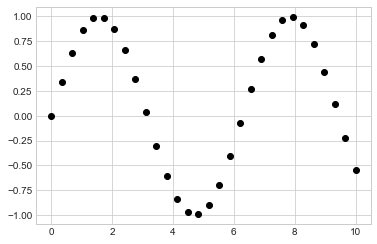

In [4]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');

Третий аргумент в вызове этой функции описывает тип символа, применяемого для графика. Для управления стилем линии можно использовать такие опции, как '-' и '--'. Для стиля маркера существует свой набор кратких строковых кодов. Полный список можно найти в документации по функции plt.plot или в онлайн-документации по библиотеке Matplotlib. Большинство вариантов интуитивно понятны, мы продемонстрируем часто используемые

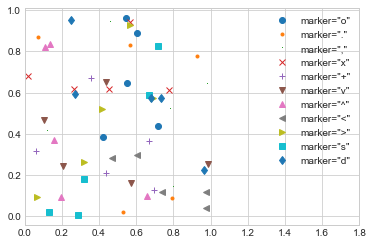

In [5]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker, label = 'marker="{0}"'.format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);


Эти символьные коды можно использовать совместно с кодами линий и цветов, рисуя точки вместе с соединяющей их линией:


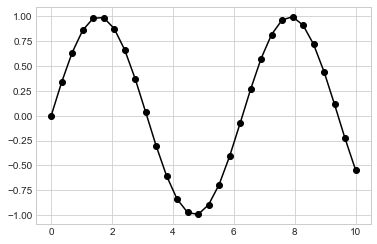

In [6]:
plt.plot(x, y, '-ok'); # линия (-), маркер круга (o), черный цвет (k)

С помощью дополнительных ключевых аргументов функции plt.plot можно задавать множество свойств линий и маркеров:

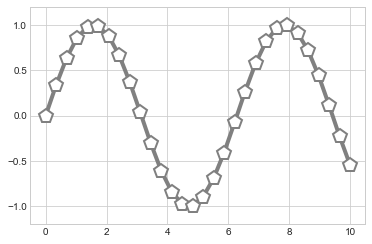

In [27]:
plt.plot(x, y, '-p', color='gray', markersize=15, linewidth=4, 
         markerfacecolor='white', markeredgecolor='gray', markeredgewidth=2)
plt.ylim(-1.2, 1.2);

Подобная гибкость функции plt.plot позволяет использовать широкий диапазон настроек визуализации. Полное описание имеющихся настроек можно найти в документации по функции plt.plot.

## Построение диаграмм рассеяния с помощью функции plt.scatter

Еще большими возможностями обладает метод построения диаграмм рассеяния с помощью функции plt.scatter, во многом напоминающей функцию plt.plot:

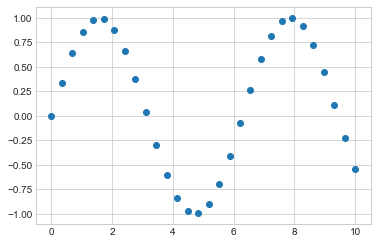

In [29]:
plt.scatter(x, y, marker='o');

Основное различие между функциями plt.scatter и plt.plot состоит в том, что с помощью первой можно создавать диаграммы рассеяния с индивидуально задаваемыми (или выбираемыми в соответствии с данными) свойствами каждой точки (размер, цвет заливки, цвет рамки и т. д.).

Продемонстрируем это, создав случайную диаграмму рассеяния с точками различных цветов и размеров. Чтобы лучше видеть перекрывающиеся результаты, воспользуемся ключевым словом alpha для настройки уровня прозрачности:

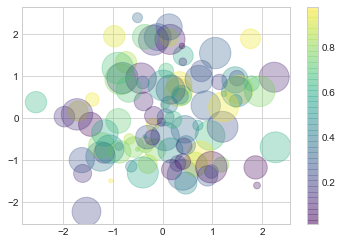

In [34]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.colorbar();

Обратите внимание, что цвета автоматически привязываются к цветовой шкале (которую мы отобразили с помощью команды colorbar()), а размеры указываются в пикселах. Благодаря всему этому можно использовать цвет и размер точек для передачи информации на графике с целью иллюстрации многомерных данных.
Для примера возьмем набор данных Iris из библиотеки Scikit-Learn, каждая выборка представляет собой один из трех типов цветов с тщательно измеренными лепестками и чашелистиками:

In [40]:
from sklearn.datasets import load_iris
iris = load_iris()

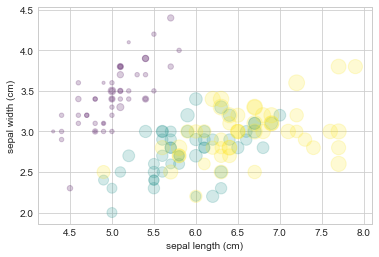

In [47]:
features = iris.data.T
plt.scatter(features[0], features[1], alpha=0.2, s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

Как видим, эта диаграмма рассеяния позволила нам одновременно исследовать четыре различных измерения данных: (x, y)-координаты каждой точки соответствуют длине и ширине чашелистика, размер точки — ширине лепестков, цвет — конкретной разновидности цветка. Подобные многоцветные диаграммы рассеяния с несколькими признаками для каждой точки будут очень полезны как для исследования, так и для представления данных.

## Сравнение функций plot и scatter: примечание относительно производительности

При небольших объемах данных это не играет роли, но при наборах данных, превышающих несколько тысяч точек, функция plt.plot может оказаться намного эффективнее plt.scatter. Поскольку plt.scatter умеет визуализировать различные размеры и цвета каждой точки, визуализатору приходится выполнять дополнительную работу по формированию каждой точки в отдельности. В случае же функции plt.plot, напротив, точки всегда двойники друг друга, поэтому работа по определению внешнего вида точек выполняется только один раз для всего набора данных. Для больших наборов данных это различие может приводить к коренным различиям в производительности, поэтому в таком случае следует использовать функцию plt.plot, а не plt.scatter.